In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
file_path = "/Users/rohit/Desktop/SMSSpamCollection.txt"

In [6]:
df = pd.read_csv(file_path, sep = "\t")

In [7]:
df.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [8]:
msgs = pd.read_csv(file_path, sep = "\t", names = ["label", "message"])

In [9]:
msgs

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
msgs[:4]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [11]:
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
duplicatedRow = msgs[msgs.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [13]:
msgs.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [14]:
lemmatizer=WordNetLemmatizer()

In [15]:
corpus = []

In [16]:
for i in range(0,len(msgs)):
    review=re.sub('[^a-zA-Z]','',msgs['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [17]:
df.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [18]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
ham_msg = msgs[msgs.label == 'ham']
spam_msg = msgs[msgs.label == 'spam']

In [20]:
ham_msg_txt = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_txt = " ".join(spam_msg.message.to_numpy().tolist())

In [21]:
plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

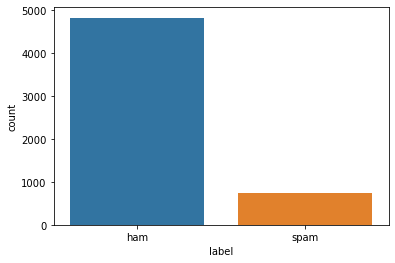

In [22]:
sns.countplot(msgs.label)

In [26]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44) #Downsampling
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


In [24]:
spam_msg_df = spam_msg.sample(n = len(ham_msg), random_state = 42, replace = True) #Upsampling
ham_msg_df = spam_msg
print(spam_msg_df.shape)

(4825, 2)


/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Message types')

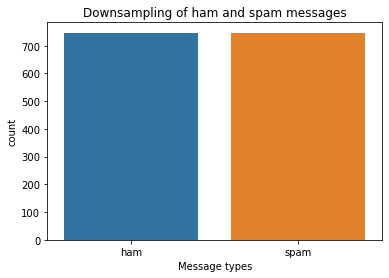

In [29]:
message_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(6,4))
sns.countplot(message_df.label)
plt.title('Downsampling of ham and spam messages')
plt.xlabel('Message types')

In [30]:
message_df['text_length'] = message_df['message'].apply(len)

In [31]:
labels = message_df.groupby('label').mean()

In [32]:
message_df['message_type']= message_df['label'].map({'ham': 0, 'spam': 1})
message_label = message_df['message_type'].values

In [35]:
train_msg, test_msg, train_labels, test_labels = train_test_split(message_df['message'], message_label, test_size=0.2, random_state=434)

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
max_length = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocabsize = 500

In [37]:
vocabsize = 500     #Sequential model hyper parameters
embeding_dim = 16
drop_value = 0.2 
n_dense = 24

In [38]:
model = Sequential()
model.add(Embedding(vocabsize, embeding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

2022-03-02 12:02:04.722273: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
pd.options.display.max_colwidth=100
msgs[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...


In [40]:
tokenizer = Tokenizer(num_words = vocabsize, char_level = False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [41]:
word_index = tokenizer.word_index

In [42]:
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 

In [43]:
total = len(word_index)
total

4169

In [44]:
train_data = tokenizer.texts_to_sequences(train_msg)
train_padded = pad_sequences (train_data, maxlen = max_length, padding = padding_type, truncating = trunc_type)
test_data = tokenizer.texts_to_sequences(test_msg)
test_padded = pad_sequences(test_data, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [45]:
print(train_padded.shape)

(1195, 50)


In [46]:
print(test_padded.shape)

(299, 50)


In [47]:
len(train_padded[0]), len(test_padded[0])

(50, 50)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [50]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 1s - loss: 0.6834 - accuracy: 0.6435 - val_loss: 0.6722 - val_accuracy: 0.7960 - 1s/epoch - 37ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6543 - accuracy: 0.8351 - val_loss: 0.6318 - val_accuracy: 0.8395 - 112ms/epoch - 3ms/step
Epoch 3/30
38/38 - 0s - loss: 0.5937 - accuracy: 0.8653 - val_loss: 0.5606 - val_accuracy: 0.8428 - 109ms/epoch - 3ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5078 - accuracy: 0.8736 - val_loss: 0.4725 - val_accuracy: 0.8462 - 115ms/epoch - 3ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4121 - accuracy: 0.8937 - val_loss: 0.3949 - val_accuracy: 0.8629 - 105ms/epoch - 3ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3391 - accuracy: 0.9046 - val_loss: 0.3354 - val_accuracy: 0.8796 - 101ms/epoch - 3ms/step
Epoch 7/30
38/38 - 0s - loss: 0.2854 - accuracy: 0.9121 - val_loss: 0.2893 - val_accuracy: 0.8896 - 118ms/epoch - 3ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2378 - accuracy: 0.9230 - val_loss: 0.2496 - val_accuracy: 0.8963 - 109ms/epoch - 3ms/step
Epoch 9/30
38/38 -

In [51]:
model.evaluate(test_padded, test_labels)

10/10 [==============================] - 0s 4ms/step - loss: 0.1242 - accuracy: 0.9465


[0.12415491044521332, 0.9464883208274841]

In [56]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'TrainingLoss', 
                          'accuracy': 'TrainingAccuracy', 
                          'val_loss': 'ValidationLoss', 
                          'val_accuracy': 'ValidationAccuracy'}, inplace = True)

In [57]:
def graph(v1, v2, string):
    metrics[[v1,v2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel('Number of epochs')
    plt.ylabel(string)
    plt.legend([v1,v2])

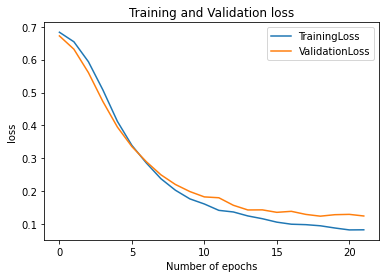

In [58]:
graph('TrainingLoss', 'ValidationLoss', 'loss')

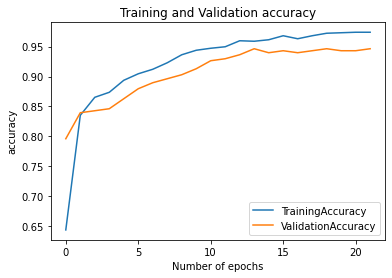

In [59]:
graph('TrainingAccuracy', 'ValidationAccuracy', 'accuracy')

In [66]:
n_bilstm = 20
drop_bilstm = 0.2

In [67]:
model2 = Sequential() #Bidirectional LSTM
model2.add(Embedding(vocabsize, embeding_dim, input_length=max_length))
model2.add(Bidirectional(LSTM(n_bilstm, dropout=drop_bilstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [68]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [69]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(train_padded, train_labels, epochs = num_epochs, 
                    validation_data=(test_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30


ValueError: in user code:

    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 50, 1) vs (None,)).


In [71]:
n_lstm = 20
drop_lstm = 0.2

In [72]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocabsize, embeding_dim, input_length=max_length))
model_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model_lstm.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model_lstm.add(Dense(1, activation='sigmoid'))

In [73]:
model_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [75]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model_lstm.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30


ValueError: in user code:

    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/rohit/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 50, 1) vs (None,)).


In [76]:
model.evaluate(test_padded, test_labels)

10/10 [==============================] - 0s 4ms/step - loss: 0.1242 - accuracy: 0.9465


[0.12415491044521332, 0.9464883208274841]

In [77]:
predict_msg = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.", 
               "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info",
              "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

In [79]:
def spam_prediction(predict_msg):
    newseq = tokenizer.texts_to_sequences(predict_msg)
    padded_msg = pad_sequences(newseq, maxlen = max_length, padding = padding_type, truncating = trunc_type)
    return (model.predict(padded_msg))

spam_prediction(predict_msg)

array([[0.0202387 ],
       [0.99957114],
       [0.99973977]], dtype=float32)

In [80]:
predict_msg = ["Your SBI account will be blocked today, click on this link to update your PAN card",
          "What's up?",
              "I'll be there soon"]

In [81]:
spam_prediction(predict_msg)

array([[0.78662956],
       [0.02624333],
       [0.00838122]], dtype=float32)